In [34]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.ndimage import gaussian_filter

In [54]:
# importing pandas 
import pandas as pd 
  
# Creating new dataframe 
initial_data = {'First_name': ['Ram', 'Mohan', 'Tina', 'Jeetu', 'Meera'],  
                'Last_name': ['Kumar', 'Sharma', 'Ali', 'Gandhi', 'Kumari'],  
                'Marks': [12, 52, 36, 85, 23] } 
df = pd.DataFrame(initial_data, columns = ['First_name', 'Last_name', 'Marks']) 
df

,First_name,Last_name,Marks
0,Ram,Kumar,12
1,Mohan,Sharma,52
2,Tina,Ali,36
3,Jeetu,Gandhi,85
4,Meera,Kumari,23


In [56]:
result = [] 
for value in df["Marks"]: 
    if value >= 33: 
        result.append("Pass") 
    elif value < 0 and value > 100: 
        result.append("Invalid") 
    else: 
        result.append("Fail") 
       
df["Result"] = result    
df 

,First_name,Last_name,Marks,Result
0,Ram,Kumar,12,Fail
1,Mohan,Sharma,52,Pass
2,Tina,Ali,36,Pass
3,Jeetu,Gandhi,85,Pass
4,Meera,Kumari,23,Fail


In [130]:
tag = 4*['dope1'] + 9*['dope1_post']+ 12*['dope2']+ 42*['dope2_post']+ 20*['dope3']+ 68*['dope3_post']+ 16*['dope4']+ 52*['dope4_post']+ 23*['dope5'] + 19*['dope5_post']
len(tag)

265

In [131]:
from pylab import rcParams
from cycler import cycler
rcParams['figure.figsize'] = 16, 9
#rcParams['figure.figsize'] = 5, 5
rcParams.update({'figure.max_open_warning': 0, 'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18,
                 'axes.grid':True, 'xtick.direction': 'in', 'ytick.direction': 'in', 'ytick.right': True,
                 'xtick.top':True,'ytick.major.size': 20, 'xtick.major.size': 20, 'legend.fancybox': True,
                 'legend.markerscale': 0.9, 'legend.handlelength': 5.0, 
                  #'axes.prop_cycle': cycler('color',
                   #        ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                    #        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
                })
colors = ['#66D9EF', '#A6E22E', '#FD971F', '#ae81ff', '#F92672']

mpl.rcParams['grid.linestyle'] = '-.'


In [132]:
import datetime
dict_int = {}
run = []
non_Quartz=[]
Quartz=[]
#ratio=[]

#places.append(i)

dirname = '/eos/user/f/fdolek/SWAN_projects/pods/'


#if not os.path.exists('LAr_f'):
 #   os.makedirs('LAr_f')
##########################################################    
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            run_name = ( filename.split('.pkl')[0] ) 
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
##########################################################
            dict_s ={}
            for key, value in mydata.items():
                # filtfilt
                b, a = signal.butter(3, 0.05)
                channel = signal.filtfilt(b, a, value)
                dict_s.update({key:channel})
                #dict_s.update({key:value})
            if run_name =='2020-02-13_19-27-47' or run_name == '2020-02-14_00-34-41' or run_name ==  '2020-02-14_07-35-13':
                #print(run_name)
                non_Qall = np.mean([dict_s['Ch1'], dict_s['Ch2'], dict_s['Ch3']], axis=0 )
                non_Qbase = non_Qall - non_Qall[0:180].mean()
            
                Quartzall = ( np.mean([dict_s['Ch4'], dict_s['Ch5'], dict_s['Ch7']], axis=0 ))
                Qbase = Quartzall - Quartzall[0:180].mean()
                
                non_Quartz.append(integrate.simps(non_Qbase[230:1300]))
                Quartz.append(integrate.simps(Qbase[230:1300]))
                #ratio.append(integrate.simps(Qbase[230:1300]) / integrate.simps(non_Qbase[230:1300]))
                #print(non_Quartz)
            
            else:
                #print(run_name)
                non_Qall = np.mean([dict_s['Ch1'], dict_s['Ch2'], dict_s['Ch3']], axis=0 )
                non_Qbase = non_Qall - non_Qall[0:390].mean()

                Quartzall = ( np.mean([dict_s['Ch4'], dict_s['Ch5'], dict_s['Ch7']], axis=0 ))
                Qbase = Quartzall - Quartzall[0:390].mean()

                non_Quartz.append(integrate.simps(non_Qbase[390:1500]))
                Quartz.append(integrate.simps(Qbase[390:1500]))
                #ratio.append( integrate.simps(Qbase[390:1500]) / integrate.simps(non_Qbase[390:1500]))
            
            date_time_str = run_name
            date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d_%H-%M-%S')            
            #print('Date:', date_time_obj.date())
            #print('Time:', date_time_obj.time())
            #print(date_time_obj)
            #if date_time_obj < datetime.datetime(2020, 2, 15, 8, 1, 1):
            #    print('dope1')
            
            run.append(date_time_obj)
            #print(run_name, ',' ,integrate.simps(Qbase[390:1500]) ,',' , integrate.simps(non_Qbase[390:1500]) )
#print(len(ratio))
#run
#run

In [144]:
import pandas as pd

Ratio = {'non_Quartz': non_Quartz,
        'Quartz': Quartz,
        'Date': run,
         'Tag':tag,
        }
                                                                                                                        
df = pd.DataFrame(Ratio, columns= ['Date', 'Tag','Quartz', 'non_Quartz'])
#print(ratio['Date'])
df.tail()

,Date,Tag,Quartz,non_Quartz
260,2020-05-27 22:31:43,dope5_post,171132.843603,210381.522479
261,2020-05-28 08:27:32,dope5_post,117859.948401,157577.195579
262,2020-05-28 11:24:50,dope5_post,138340.423639,180800.501223
263,2020-05-28 15:00:26,dope5_post,144370.865393,167510.222189
264,2020-05-28 18:21:19,dope5_post,107970.531475,134334.199391


In [134]:
df['ratio'] = df['Quartz']/df['non_Quartz']

In [135]:
df.tail()

,Date,Tag,Quartz,non_Quartz,ratio
260,2020-05-27 22:31:43,dope5_post,171132.843603,210381.522479,0.813440
261,2020-05-28 08:27:32,dope5_post,117859.948401,157577.195579,0.747951
262,2020-05-28 11:24:50,dope5_post,138340.423639,180800.501223,0.765155
263,2020-05-28 15:00:26,dope5_post,144370.865393,167510.222189,0.861863
264,2020-05-28 18:21:19,dope5_post,107970.531475,134334.199391,0.803746


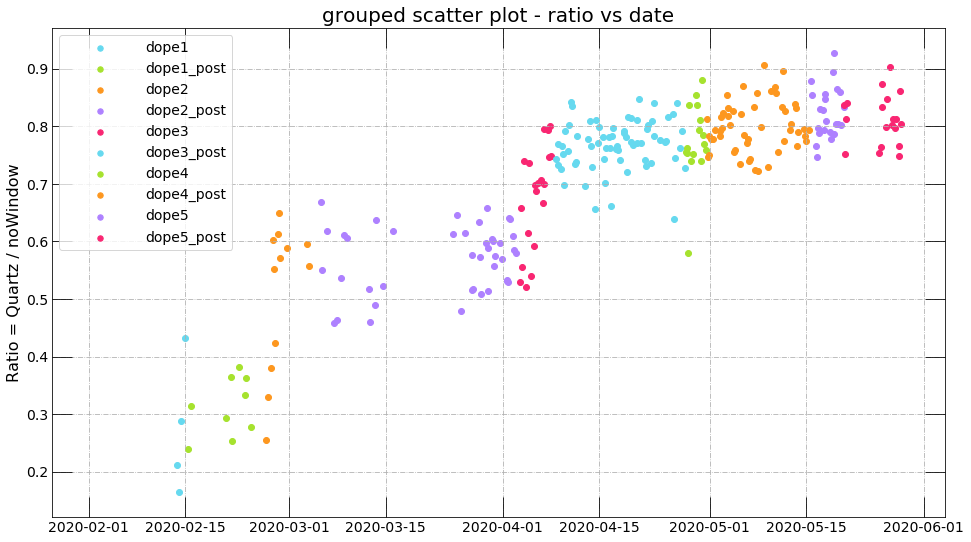

In [136]:
fig,ax = plt.subplots()
ax.set_prop_cycle(cycler(color=colors))
print(df.groupby('Tag')) 
for k,d in df.groupby('Tag'):
    ax.scatter(d['Date'], d['ratio'], label=k, marker='o')
    
plt.ylabel('Ratio = Quartz / noWindow', fontsize=16)
plt.title('grouped scatter plot - ratio vs date',fontsize=20)    
plt.legend()

plt.show()

In [137]:
print(df.groupby('Tag').ratio.mean())

Tag
dope1         0.274446
dope1_post    0.313311
dope2         0.510066
dope2_post    0.570188
dope3         0.676627
dope3_post    0.768349
dope4         0.775516
dope4_post    0.799264
dope5         0.823600
dope5_post    0.811859
Name: ratio, dtype: float64


In [138]:
import seaborn as sns

(737465.0, 737577.0)

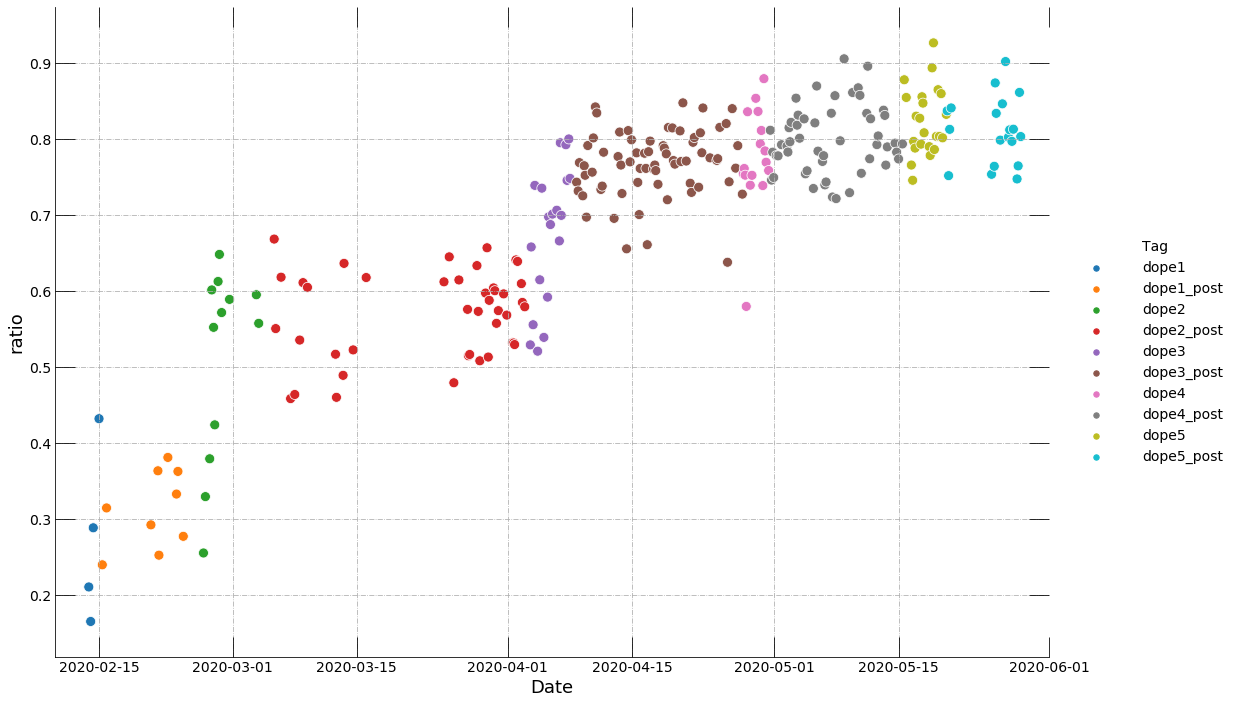

In [139]:
ax.set_prop_cycle(cycler(color=colors))
sns.relplot(x='Date', y='ratio', data=df,
            hue='Tag',
            s=100,
            height=10, 
            aspect=1.5)
plt.xlim(pd.to_datetime('2020-02-10'), # pd.to_datetime('2016') also works
        pd.to_datetime('2020-06-01'))


(737465.0, 737577.0)

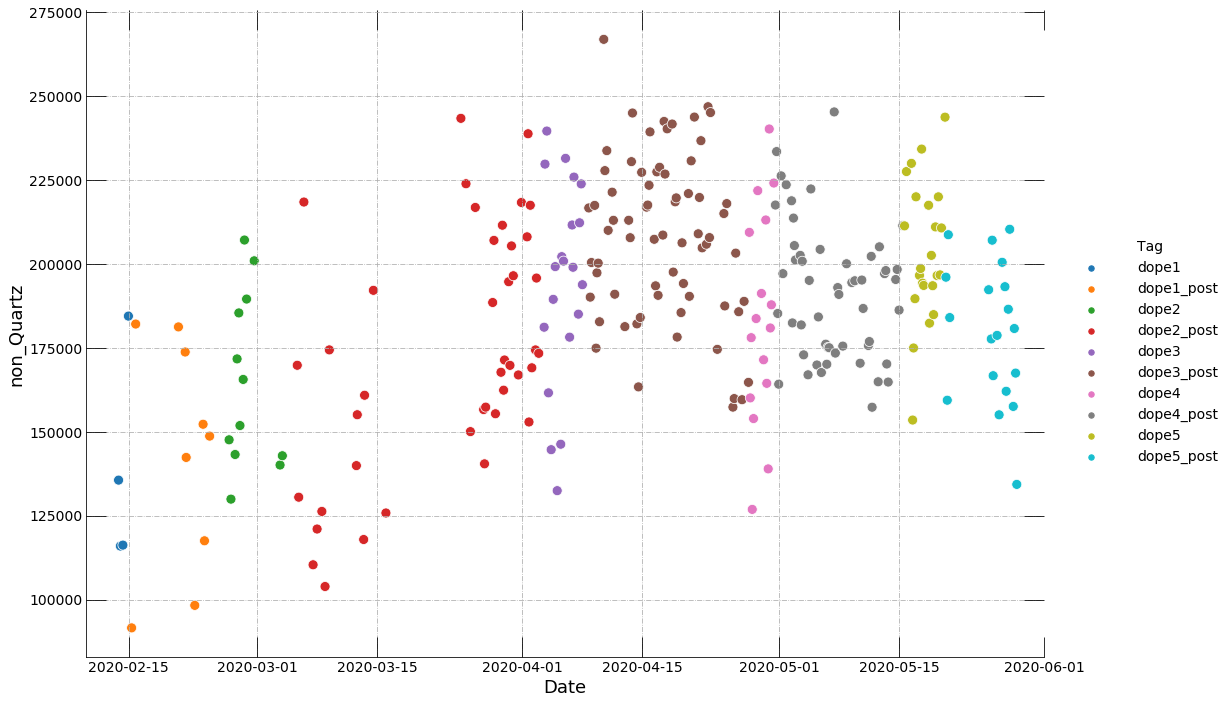

In [142]:
ax.set_prop_cycle(cycler(color=colors))
sns.relplot(x='Date', y='non_Quartz', data=df,
            hue='Tag',
            s=100,
            legend='full', 
            kind='scatter',
            height=10, 
            aspect=1.5)

plt.xlim(pd.to_datetime('2020-02-10'), # pd.to_datetime('2016') also works
        pd.to_datetime('2020-06-01'))

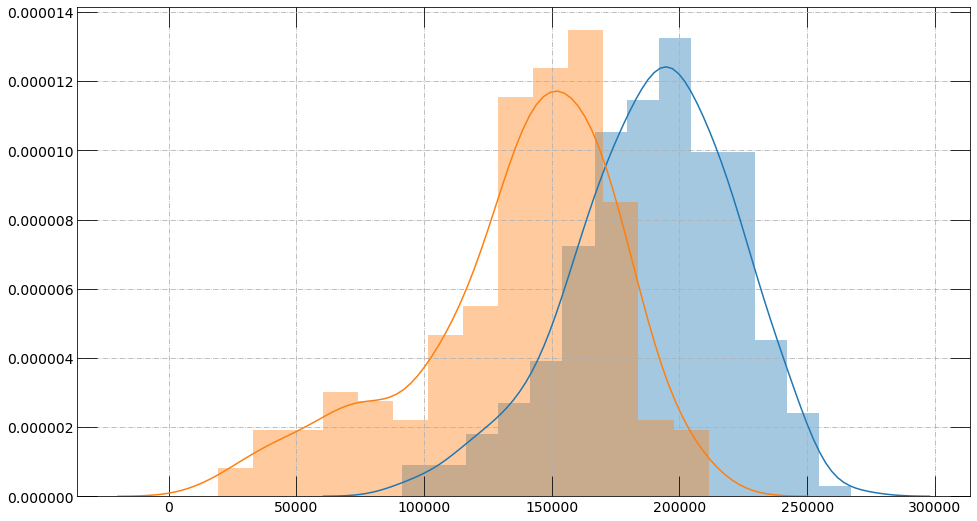

In [143]:
sns.distplot(non_Quartz, kde = True, hist = True)
sns.distplot(Quartz, kde= True, hist =True)
#sns.distplot(ratio, kde= True, hist =False)

In [ ]:
sns.distplot(Quartz, kde= True, hist =False)

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
df.index

In [ ]:
df.index.values

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['Date'],
        df['Quartz'],
        color='purple')

ax.set(xlabel="Date",
       ylabel="integral",
       title="titile, test")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(1)
import pandas as pd
plt.rcParams["figure.subplot.right"] = 0.8
v = np.random.rand(30,4)
v[:,2] = np.random.choice(np.arange(1980,2015,5), size=30)
v[:,3] = np.random.randint(5,13,size=30)

df= pd.DataFrame(v, columns=["x","y","year","quality"])
df.year = df.year.values.astype(int)
fig, ax = plt.subplots()
for i, (name, dff) in enumerate(df.groupby("year")):
    c = matplotlib.colors.to_hex(plt.cm.jet(i/7.))
    dff.plot(kind='scatter',x='x',y='y', label=name, c=c, 
             s=dff.quality**2, ax=ax)

leg = plt.legend(loc=(1.03,0), title="Year")
ax.add_artist(leg)

plt.show()